In [2]:
import pandas as pd
import plotly_express as px
medical_df=pd.read_csv('medical-charges.csv')

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

Handling Age

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig=px.histogram(medical_df,x='age', marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig=px.scatter(medical_df,x='age', y='charges',opacity=0.8, color='smoker',hover_data='sex',title='age vs charges')
fig.show()

age shows a linear relationship with the charges

BODY MASS INDEX(BMI)

In [11]:
fig=px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.scatter(medical_df,x='bmi', y='charges', color='smoker')
fig.show()

BMI doesn't show a really clear linear relationship with charges however combined with smokers(yes), it shows a linear trend

CHARGES

In [13]:
fig=px.histogram(medical_df,x='charges', color='smoker',marginal='box',color_discrete_sequence=['green','grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smokers have higher charges than non smokers

In [14]:
fig=px.scatter(medical_df,x='charges', color='smoker')
fig.show()

SEX

In [15]:
fig=px.histogram(medical_df,x='sex', color='smoker',marginal='box',color_discrete_sequence=['red','blue'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

There are more male smokers than female smoker

In [16]:
fig=px.histogram(medical_df,x='sex',y='charges', color='smoker')
fig.show()

In [17]:
There are lesser female smokers paying less than male smokers

SyntaxError: invalid syntax (2365150885.py, line 1)

REGION

In [ ]:
fig=px.histogram(medical_df,x='region', color='smoker',marginal='box',color_discrete_sequence=['green','grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

There are more people located in the southeast suburb with a higher smoker count too

SMOKER

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [ ]:
px.histogram(medical_df,x='smoker',color='region',title='Smoker')

In [ ]:
px.histogram(medical_df,x='sex',color='smoker',title='Smoker')

CORRELATION

In [ ]:
#correlation of charges and age
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
#correlation of charges and age
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
#correlation of charges and children
medical_df.charges.corr(medical_df.children)

0.06799822684790477

In [ ]:
#correlation of charges and smokers
#first change categorical values to numerical values
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df['smoker'].map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984773

Text(0.5, 1.0, 'Correlation Matrix')

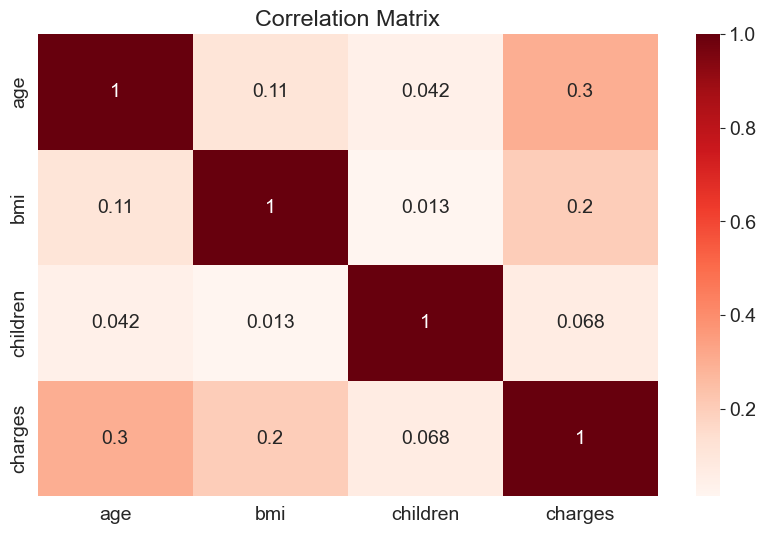

In [18]:
#convert all categorical values to numeric values
sns.heatmap(medical_df.select_dtypes(include=[int,float]).corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

LINEAR REGRESSION USING A SINGLE FEATURE

#smoker and age have higher correlation with chargers so we find a way of estimating charges using the values of age for non smokers

In [69]:
non_smoker_df=medical_df[medical_df['smoker']=='no']##selecting all non smokers as a dataframe
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

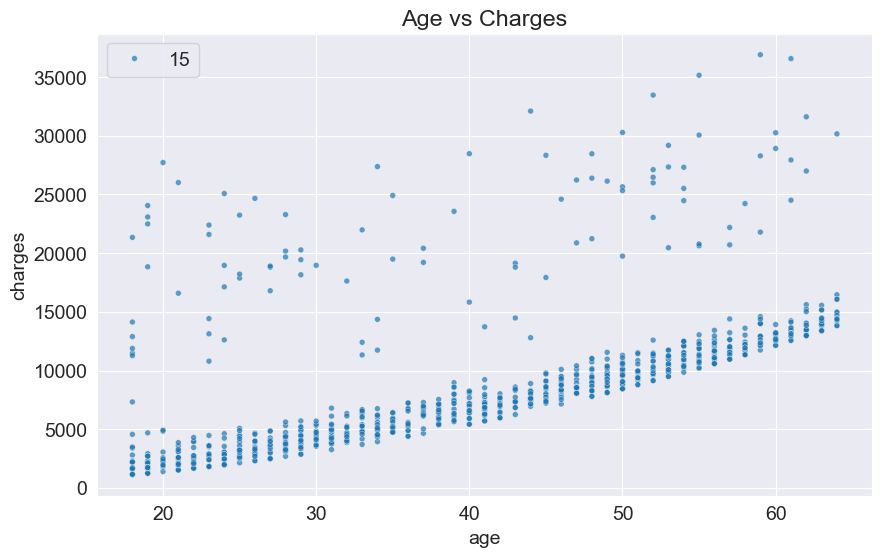

In [70]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age', y='charges', alpha=0.7, size=15)

In [71]:
import numpy as np
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

Linear Regression using scikit-learn

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model=LinearRegression()

In [76]:
#x_test,x_train,y_test,y_train are more ideal for fitting the model with a test size of 0.2
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [77]:
model.fit(inputs,targets)

LinearRegression()

In [81]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [83]:
#rmse calculates how much our prediction is off
#a lower rmse means a good model prediction
rmse(targets,predictions)

4662.505766636395

In [85]:
#y=mx+c
#coefficient of x which is m
model.coef_

array([267.24891283])

In [86]:
model.intercept_

-2091.4205565650864

LINEAR REGRESSION USING A SINGLE FEATURE

#smoker and age have higher correlation with chargers so we find a way of estimating charges using the values of age for smokers

In [87]:
smoker_df=medical_df[medical_df['smoker']=='yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

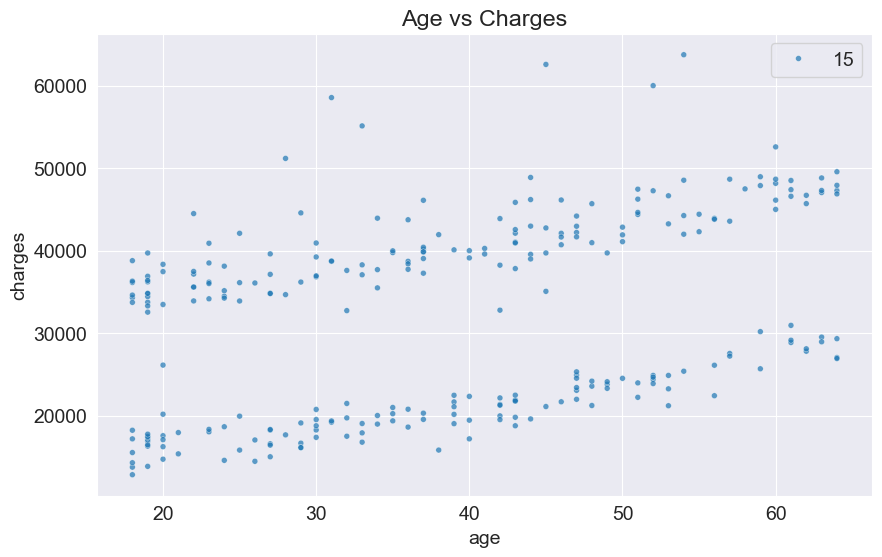

In [90]:
plt.title('Age vs Charges')
sns.scatterplot(data=smoker_df,x='age', y='charges', alpha=0.7, size=15)

In [88]:
inputs=smoker_df[['age']]
targets=smoker_df.charges

In [91]:
model=LinearRegression()

In [92]:
model.fit(inputs,targets)

LinearRegression()

In [93]:
predictions=model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [94]:
rmse(targets,predictions)

10711.00334810241

LINEAR REGRESSION USING MULTIPLE FEATURES

In [104]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [106]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges')
fig.show()

In [95]:
inputs=non_smoker_df[['age','bmi']]
targets=non_smoker_df['charges']

In [96]:
model=LinearRegression()
model.fit(inputs,targets)

LinearRegression()

In [98]:
predictions=model.predict(inputs)
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [99]:
loss=rmse(targets,predictions)
print(loss)

4662.3128354612945


In [105]:
smoker_df.charges.corr(smoker_df.bmi)

0.8064806070155403

In [107]:
fig=px.scatter(smoker_df,x='bmi',y='charges')
fig.show()

In [100]:
inputs=smoker_df[['age','bmi']]
targets=smoker_df['charges']

In [101]:
model=LinearRegression()
model.fit(inputs,targets)

LinearRegression()

In [102]:
predictions=model.predict(inputs)
predictions

array([22814.8409452 , 31950.08008214, 45409.21342133, 36385.92867933,
       32590.350052  , 38090.31188592, 34687.01818455, 37435.24431309,
       39687.57444442, 50989.91391181, 37839.87292328, 30681.12453098,
       36732.54286646, 46222.15151979, 27984.5326368 , 24649.55981714,
       15200.39458269, 19574.15430565, 20415.19213876, 37591.96196998,
       37530.92875384, 22540.79339223, 37622.12205026, 36242.04549044,
       39687.50035381, 21234.8299084 , 15506.8107428 , 36904.05812631,
       23260.89454177, 44871.57295524, 25535.28682158, 34433.56042882,
       23390.07733836, 11701.58774183, 23070.1877453 , 26880.14728245,
       33736.57708587, 22425.00993798, 25532.75881225, 18629.75079313,
       36716.6896054 , 27070.0438127 , 35419.46301833, 48624.99042058,
       47467.89205371, 36708.76297486, 26845.42196724, 32737.66872712,
       24251.38548624, 20238.62086025, 24497.40739518, 36492.06775994,
       34301.60423103,  7290.40339307, 40715.4900147 , 41209.42287694,
      

In [103]:
loss=rmse(targets,predictions)
print(loss)

5722.782238884456


In [108]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542197

In [109]:
fig=px.scatter(non_smoker_df,x='children',y='charges')
fig.show()

In [110]:
inputs=non_smoker_df[['age','bmi','children']]
targets=non_smoker_df.charges

In [111]:
model=LinearRegression().fit(inputs,targets)

In [112]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[2724.94209163 6535.13457204 6065.27173951 ... 2134.51524931 2160.54349555
 2898.08585583]
4608.470405038246


Predicting using original dataset

In [148]:
inputs=medical_df[['age','bmi']]
targets=medical_df.charges

In [149]:
model=LinearRegression().fit(inputs,targets)

In [150]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[ 7461.6062016   9174.18050678 11337.10516586 ... 10199.71298649
  7246.24106669 18012.2680297 ]
11374.110466839007


In [145]:
inputs=medical_df[['age','bmi','children']]
targets=medical_df.charges

In [146]:
model=LinearRegression().fit(inputs,targets)


In [147]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[ 6908.77753344  9160.97706103 12390.94691779 ...  9640.92917145
  6691.39141657 17377.08299024]
11355.317901125973


The loss or cost function for the original data is too huge hence using a split data of non smokers and smokers is better 

USING CATEGORICAL DATA FOR LINEAR REGRESSION 

In [116]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [117]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984773

In [118]:
inputs=medical_df[['age','bmi','children','smoker_code']]
targets=medical_df.charges

In [119]:
model=LinearRegression().fit(inputs,targets)

In [120]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[25587.42524891  3880.94594512  7158.62006921 ...  4398.7459491
  1615.83647369 36793.67069541]
6056.439217188081


Adding the smoker categorical data reduced the loss from 11355 to 6056, a significant improvement in the model

In [123]:
#adding the sex categorical data
sex_codes={'female':0,'male':1}
medical_df['sex_code']=medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [127]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202548

In [124]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code']]
targets=medical_df.charges

In [125]:
model=LinearRegression().fit(inputs,targets)

In [126]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[25661.85689486  3818.77858262  7096.73025538 ...  4465.88909619
  1676.96948913 36863.89250792]
6056.100708754546


sex has no significant correlation with charges

ONE-HOT ENCODING

used for categorical data that are not binary(0 or 1) in nature 

<Axes: xlabel='region', ylabel='charges'>

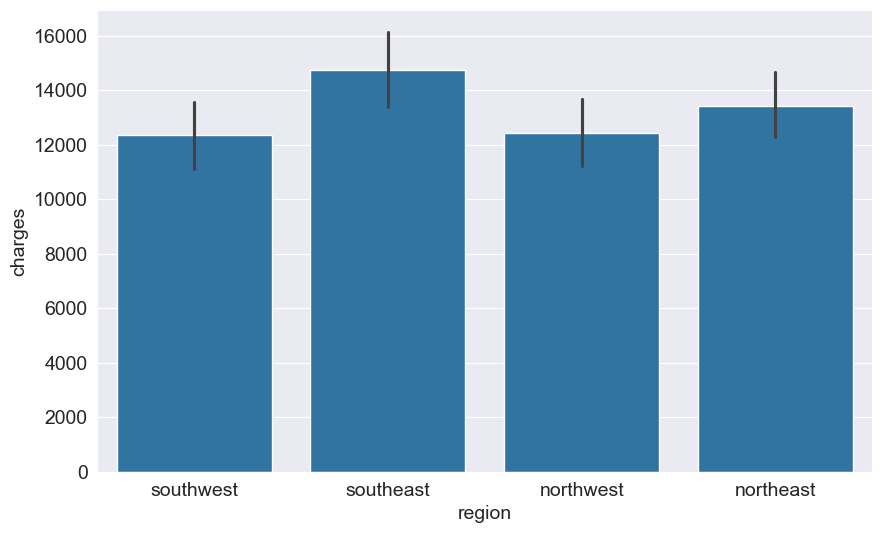

In [128]:
sns.barplot(data=medical_df, x='region',y='charges')

In [129]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [130]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [132]:
medical_df[['northeast','northwest','southeast','southwest']]= one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [138]:
print(medical_df.charges.corr(medical_df.northwest))
print(medical_df.charges.corr(medical_df.northeast))
print(medical_df.charges.corr(medical_df.southwest))
print(medical_df.charges.corr(medical_df.southeast))

-0.03990486404043805
0.0063487712801560655
-0.043210028991684774
0.07398155156575982


In [139]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code','northwest','northeast','southwest','southeast']]
targets=medical_df.charges

In [140]:
model=LinearRegression().fit(inputs,targets)

In [141]:
predictions=model.predict(inputs)
print(predictions)
loss=rmse(targets,predictions)
print(loss)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]
6041.6796511744515


Region has a slight correlation with charges

In [ ]:
#inferences
Single Feature Losses
non_smoker_df(age)=4662.5058
smoker_df(age)=10711.0035

Multiple Feature Losses
non_smoker_df(age,bmi)=4662.3128
smoker_df(age,bmi)=5722.7822 
medical_df(age,bmi)=11374.1105